In [291]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [293]:
ok = pd.read_csv("rounds.csv", encoding = 'ISO-8859-1')
ok.drop(['company_permalink', 'company_category_list', 'funding_round_permalink', 'Unnamed: 16'], axis=1, inplace=True)
ok['funding_round_type'] = [i if i != 'angel' else 'seed' for i in ok['funding_round_type'].values]
for i in ok['funding_round_type'].unique()[2:]:
    ok.drop(ok.loc[ok['funding_round_type']==i].index, inplace=True)
ok['funding_round_type'] = [i if i != 'seed' else 'seed/angel' for i in ok['funding_round_type'].values]
ok[['funding_round_type', 'funding_round_code']] = [[i[0], '0'] if i[0] == 'seed/angel' else [i[0], i[1]] for i in ok[['funding_round_type', 'funding_round_code']].values]
ok.dropna(inplace=True)
ok.rename(columns={' raised_amount_usd ': 'raised_amount_usd'}, inplace=True)
ok.drop(ok[ok['raised_amount_usd'] == ' -   '].index, inplace=True)
ok['raised_amount_usd'] = [int(i[1:-1].replace(',', '')) for i in ok['raised_amount_usd'].values]

In [294]:
ok.sort_values('funded_at')
ok.drop_duplicates(subset=['company_name', 'funding_round_code'], keep='last', inplace=True)
for i in ok['company_name'].unique():
    if len(ok[ok['company_name'] == i]) == 1:
            ok.drop(ok[ok['company_name'] == i].index, inplace=True)

In [295]:
ok.sort_values(['company_name', 'funding_round_code'], inplace=True)

In [232]:
ok.to_csv('rounds_final.csv')

<AxesSubplot:xlabel='funding_round_code', ylabel='Count'>

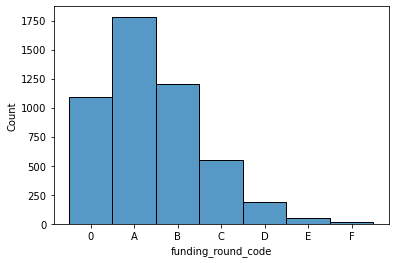

In [296]:
uh = ok.copy()
doi = pd.read_csv("companies_final.csv", encoding = 'ISO-8859-1')
doi.rename(columns={'name': 'company_name'}, inplace=True)
toi = uh.merge(doi[['company_name', 'founded_at']], on='company_name')
sns.histplot(x='funding_round_code', data=toi[['funding_round_code']])
toi.drop_duplicates(subset=[''],)

In [308]:

toi.drop(toi[-toi['funding_round_code'].isin(['A', 'B', 'C', '0'])].index, inplace=True)


In [309]:
toi

,company_name,company_market,company_country_code,company_state_code,company_region,company_city,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd,founded_at
0,1000memories,Curated Web,USA,CA,SF Bay Area,San Francisco,seed/angel,0,2010-01-01,2010-01,2010-Q1,2010.0,15000,2010-07-01
1,1000memories,Curated Web,USA,CA,SF Bay Area,San Francisco,venture,A,2011-02-16,2011-02,2011-Q1,2011.0,2520000,2010-07-01
2,1366 Technologies,Manufacturing,USA,MA,Boston,Bedford,venture,A,2008-03-27,2008-03,2008-Q1,2008.0,12400000,2007-01-01
3,1366 Technologies,Manufacturing,USA,MA,Boston,Bedford,venture,B,2010-12-16,2010-12,2010-Q4,2010.0,6000000,2007-01-01
4,1366 Technologies,Manufacturing,USA,MA,Boston,Bedford,venture,C,2013-12-12,2013-12,2013-Q4,2013.0,2500000,2007-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4880,ybuy,Curated Web,USA,CA,Los Angeles,Beverly Hills,seed/angel,0,2012-01-17,2012-01,2012-Q1,2012.0,750000,2011-08-01
4881,ybuy,Curated Web,USA,CA,Los Angeles,Beverly Hills,venture,A,2012-07-05,2012-07,2012-Q3,2012.0,1000000,2011-08-01
4882,zulily,E-Commerce,USA,WA,Seattle,Seattle,venture,A,2009-12-17,2009-12,2009-Q4,2009.0,4600000,2010-01-01
4883,zulily,E-Commerce,USA,WA,Seattle,Seattle,venture,B,2010-08-04,2010-08,2010-Q3,2010.0,6000000,2010-01-01


In [310]:
toi.to_csv('rounds_final.csv')